In [98]:
from transformers import AutoTokenizer, AutoModelForCausalLM

In [3]:
#!pip install ipywidgets

In [4]:
llama_1b = AutoModelForCausalLM.from_pretrained("models/meta-llama/llama-3.2-1B")

In [5]:
tokenizer = AutoTokenizer.from_pretrained("tokenizers/meta-llama/llama-3.2-1B")

In [7]:
llama_1b

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 2048)
    (layers): ModuleList(
      (0-15): 16 x LlamaDecoderLayer(
        (self_attn): LlamaSdpaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=512, bias=False)
          (v_proj): Linear(in_features=2048, out_features=512, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (up_proj): Linear(in_features=2048, out_features=8192, bias=False)
          (down_proj): Linear(in_features=8192, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm):

In [116]:
# example outputs
input_string = "What is the meaning of life?"
tokenized_string = tokenizer(input_string, return_tensors="pt")
print(tokenized_string)
output = llama_1b.generate(tokenized_string["input_ids"], max_length=100)
print(output)
output_string = tokenizer.decode(output[0])
print(output_string)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


{'input_ids': tensor([[128000,   3923,    374,    279,   7438,    315,   2324,     30]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
tensor([[128000,   3923,    374,    279,   7438,    315,   2324,     30,   3639,
            374,    279,   7580,    315,   2324,     30,   3639,    374,    279,
           7438,    315,  14209,     30,   4314,    527,   4860,    430,    617,
           1027,   4691,    369,  24552,     13,   3639,    374,    279,   7438,
            315,   2324,     30,   1102,    374,    264,   3488,    430,    706,
          87420,  61787,     11,  90602,   5493,     11,    323,  14248,    369,
          24552,     13,    578,   4320,    311,    420,   3488,    374,    539,
            264,   4382,    832,     11,    323,    433,    374,    264,   3488,
            430,    706,    912,   3254,   4320,     13,   4452,     11,   1070,
            527,   1063,   4689,  16565,    430,    649,    387,   1511,    311,
           4320,    420,   3488,    627,    79

In [14]:
print(llama_1b.model)

LlamaModel(
  (embed_tokens): Embedding(128256, 2048)
  (layers): ModuleList(
    (0-15): 16 x LlamaDecoderLayer(
      (self_attn): LlamaSdpaAttention(
        (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
        (k_proj): Linear(in_features=2048, out_features=512, bias=False)
        (v_proj): Linear(in_features=2048, out_features=512, bias=False)
        (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        (rotary_emb): LlamaRotaryEmbedding()
      )
      (mlp): LlamaMLP(
        (gate_proj): Linear(in_features=2048, out_features=8192, bias=False)
        (up_proj): Linear(in_features=2048, out_features=8192, bias=False)
        (down_proj): Linear(in_features=8192, out_features=2048, bias=False)
        (act_fn): SiLU()
      )
      (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
    )
  )
  (norm): LlamaRMSNorm((2048,), eps=1e-05)
  (rotary_emb): LlamaRotaryEmbedding(

In [ ]:
print(llama_1b)

In [99]:
out = llama_1b(tokenized_string["input_ids"], output_hidden_states=True)

In [114]:
print(out.hidden_states[2].shape)

torch.Size([1, 8, 2048])


In [60]:
out.__class__

transformers.modeling_outputs.CausalLMOutputWithPast

In [61]:
print(out.loss)

None


In [62]:
print(out.logits.shape)

torch.Size([1, 8, 128256])


In [63]:
print(len(out.past_key_values))

16


In [64]:
dir(out)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'attentions',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'hidden_states',
 'items',
 'keys',
 'logits',
 'loss',
 'move_to_end',
 'past_key_values',
 'pop',
 'popitem',
 'setdefault',
 'to_tuple',
 'update',
 'values']

In [65]:
print(out.hidden_states)

(tensor([[[ 0.0028,  0.0033, -0.0099,  ..., -0.0018,  0.0008,  0.0007],
         [ 0.0188, -0.0120, -0.0014,  ..., -0.0022, -0.0006, -0.0016],
         [ 0.0092,  0.0172,  0.0228,  ..., -0.0090,  0.0087,  0.0086],
         ...,
         [-0.0022, -0.0160,  0.0078,  ...,  0.0043,  0.0198,  0.0171],
         [ 0.0337, -0.0021,  0.0104,  ...,  0.0044, -0.0051,  0.0070],
         [-0.0156, -0.0146,  0.0135,  ..., -0.0275, -0.0090,  0.0057]]],
       grad_fn=<EmbeddingBackward0>), tensor([[[ 0.0131, -0.0472,  0.0412,  ..., -0.0090,  0.0760, -0.0241],
         [ 0.0382,  0.0042, -0.0756,  ...,  0.0247, -0.0014,  0.0290],
         [ 0.0586,  0.0652, -0.0506,  ..., -0.0425,  0.0301,  0.0548],
         ...,
         [ 0.0230,  0.0195,  0.0107,  ...,  0.0272,  0.0553,  0.0011],
         [ 0.0118, -0.0009, -0.0320,  ...,  0.0254, -0.0473,  0.0020],
         [-0.0074, -0.0153, -0.0286,  ..., -0.0382, -0.0061,  0.0389]]],
       grad_fn=<AddBackward0>), tensor([[[ 2.1497e-01, -3.2983e-01,  1.0380e+

In [68]:
print(len(out.attentions))

16


In [75]:
print(out.attentions[2].shape)

torch.Size([1, 32, 8, 8])


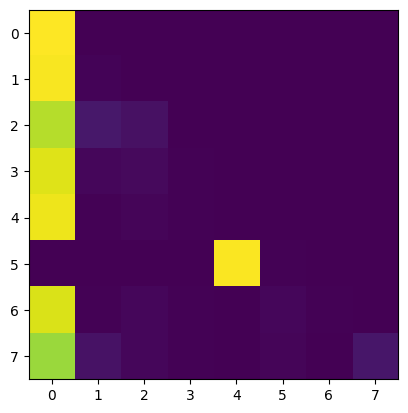

In [96]:
import matplotlib.pyplot as plt
# show the scores

plt.imshow(out.attentions[0][0].squeeze()[12].detach().numpy())
plt.show()


In [81]:
print(llama_1b.model.layers[0].self_attn.num_heads)

32


In [82]:
from transformers import AutoConfig
config = AutoConfig.from_pretrained("meta-llama/llama-3.2-1B")

In [97]:
print(llama_1b.training)

False


In [83]:
config

LlamaConfig {
  "_name_or_path": "meta-llama/llama-3.2-1B",
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": 128001,
  "head_dim": 64,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 16,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": "bfloat16",
  "transformers_version": "4.46.3",
  "use_cache": true,
  "vocab_size": 128256
}

In [84]:
llama_1b.config

LlamaConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "models/meta-llama/llama-3.2-1B",
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 128000,
  "eos_token_id": 128001,
  "head_dim": 64,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 16,
  "num_key_value_heads": 8,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": {
    "factor": 32.0,
    "high_freq_factor": 4.0,
    "low_freq_factor": 1.0,
    "original_max_position_embeddings": 8192,
    "rope_type": "llama3"
  },
  "rope_theta": 500000.0,
  "tie_word_embeddings": true,
  "torch_dtype": "float32",
  "transformers_version": "4.46.3",
  "use_cache": true,
  "vocab_size": 128256
}

In [117]:
llama_1b_truncated = AutoModelForCausalLM.from_pretrained("models/meta-llama/llama-3.2-1B")

In [120]:
llama_1b_truncated.model.layers = llama_1b_truncated.model.layers[10:]

In [121]:
llama_1b_truncated.model

LlamaModel(
  (embed_tokens): Embedding(128256, 2048)
  (layers): ModuleList(
    (0-5): 6 x LlamaDecoderLayer(
      (self_attn): LlamaSdpaAttention(
        (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
        (k_proj): Linear(in_features=2048, out_features=512, bias=False)
        (v_proj): Linear(in_features=2048, out_features=512, bias=False)
        (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        (rotary_emb): LlamaRotaryEmbedding()
      )
      (mlp): LlamaMLP(
        (gate_proj): Linear(in_features=2048, out_features=8192, bias=False)
        (up_proj): Linear(in_features=2048, out_features=8192, bias=False)
        (down_proj): Linear(in_features=8192, out_features=2048, bias=False)
        (act_fn): SiLU()
      )
      (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
    )
  )
  (norm): LlamaRMSNorm((2048,), eps=1e-05)
  (rotary_emb): LlamaRotaryEmbedding()


In [216]:
llama_out = llama_1b(tokenized_string["input_ids"], output_hidden_states=False)

In [217]:

token_ids = torch.argmax(llama_out.logits, dim=-1)
print(token_ids)
print(tokenizer.decode(token_ids[0]))


tensor([[14924,   374,   279,  6864,   315,   279,    30,  2209]])
Question is the capital of the? Is


In [218]:
a = llama_1b_truncated(inputs_embeds=out.hidden_states[10])

In [219]:
a.

AttributeError: 'CausalLMOutputWithPast' object has no attribute 'detach'

In [178]:
print((a.logits - llama_out.logits))

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], grad_fn=<SubBackward0>)


In [159]:
import torch

In [160]:
print(a.logits.shape)
token_ids = torch.argmax(a.logits, dim=-1)

torch.Size([1, 8, 128256])


In [161]:
print(token_ids)

tensor([[14924,   374,   279,  6864,   315,   279,    30,  2209]])


In [162]:
a_decoded = tokenizer.decode(token_ids[0])

In [ ]:
 374,    279,   7438,    315,   2324,     30])

In [186]:
tokenizer.decode([128000,   3923, 374,])

'<|begin_of_text|>What is'

In [163]:
a_decoded

'Question is the capital of the? Is'

In [187]:
from datasets import load_from_disk
wikitext2 = load_from_disk("data/wikitext-2")
wikitext2_train = wikitext2["train"]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [199]:
wikitext2_train['text'].__class__

list

In [200]:
text_only = wikitext2_train['text']

In [203]:
tokenized_text = [tokenizer(item, return_tensors="pt") for item in text_only]

In [205]:
tokenized_text_only = [item['input_ids'] for item in tokenized_text]

In [208]:
total_length = [item.shape[1] for item in tokenized_text_only]
total_length = sum(total_length)

In [209]:
total_length

2471740

In [212]:
(2471740 * 20) / (1024 * 1024)

47.14469909667969

In [213]:
from tqdm import tqdm

In [229]:
llama_3b = AutoModelForCausalLM.from_pretrained("models/meta-llama/llama-3.2-3B")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [236]:
llama_1b_10_outputs = []
llama_3b_18_outputs = []
llama_1b.to("mps")
llama_3b.to("mps")
for i in tqdm(tokenized_text):
    if len(i['input_ids'][0]) == 1:
        continue
    i.to("mps")
    output_1b = llama_1b(i["input_ids"], output_hidden_states=True)
    output_3b = llama_3b(i["input_ids"], output_hidden_states=True)
    llama_1b_10_outputs.append(output_1b.hidden_states[10].detach())
    llama_3b_18_outputs.append(output_3b.hidden_states[18].detach())




  4%|▍         | 1410/36718 [13:01<5:26:01,  1.80it/s]  


KeyboardInterrupt: 

In [13]:
import pickle
with open ('data/chunked_wikitext2/train.pkl', 'rb') as f:
    test_data = pickle.load(f)


In [14]:
print(test_data[2])

 = Cicely Mary Barker = 
 Cicely Mary Barker ( 28 June 1895 – 16 February 1973 ) was an English illustrator best known for a series of fantasy illustrations depicting fairies and flowers . Barker 's art education began in girlhood with correspondence courses and instruction at the Croydon School of Art . Her earliest professional work included greeting cards and juvenile magazine illustrations , and her first book , Flower Fairies of the Spring , was published in 1923 . Similar books were published in the following decades . 
 Barker was a devout Anglican , and donated her artworks to Christian fundraisers and missionary organizations . She produced a few Christian @-@ themed books such as The Children ’ s Book of Hymns and , in collaboration with her sister Dorothy , He Leadeth Me . She designed a stained glass window for St. Edmund 's Church , Pitlake , and her painting of the Christ Child , The Darling of the World Has Come , was purchased by Queen Mary . 
 Barker was equally profic

In [15]:
from transformers import AutoTokenizer
llama_tokenizer = AutoTokenizer.from_pretrained("tokenizers/meta-llama/llama-3.2-1B")

In [16]:
tokenized_text = [llama_tokenizer(item) for item in test_data]

In [17]:
lengths = [len(item["input_ids"]) for item in tokenized_text]
print(sum(lengths) / len(lengths))

3872.2591414944354


In [18]:
print(max(lengths))

20498


In [19]:
max_length = 0
index = -1
for i, l in enumerate(lengths):
    if l > max_length:
        max_length = l
        index = i
print(index)

294


In [21]:
print(test_data[294])

 = Bob Dylan = 
 Bob Dylan ( / ˈdɪlən / ; born Robert Allen Zimmerman , May 24 , 1941 ) is an American singer @-@ songwriter , artist and writer . He has been influential in popular music and culture for more than five decades . Much of his most celebrated work dates from the 1960s when his songs chronicled social unrest , although Dylan repudiated suggestions from journalists that he was a spokesman for his generation . Nevertheless , early songs such as " Blowin ' in the Wind " and " The Times They Are a @-@ Changin ' " became anthems for the American civil rights and anti @-@ war movements . After he left his initial base in the American folk music revival , his six @-@ minute single " Like a Rolling Stone " altered the range of popular music in 1965 . His mid @-@ 1960s recordings , backed by rock musicians , reached the top end of the United States music charts while also attracting denunciation and criticism from others in the folk movement . 
 Dylan 's lyrics have incorporated va

In [12]:
print(16078 * 20 / (1024 * 1024))

0.30666351318359375
